# Problem Statement

- To build a multiple linear regression model for the prediction of demand for shared bikes for bike-sharing provider BoomBikes based in US. 

## Objective: 
 - 1. Which variables are significant in predicting the demand for shared bikes?
 - 2. How well those variables describe the bike demands?
 
 ###

# 1. Understanding & Visualising the data

In [1]:
#Importing necessary libraries
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data = pd.read_csv('day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations
- Data seems to be clean with correct data format and have no missing values 

In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 1a. Data Cleaning & Mapping
- to drop unwanted columns
- to map the categorical columns and then create dummy variables for values are more than 2

In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#Dropping not useful columns
data1 = data.drop(['dteday','instant','casual', 'registered'], axis = 1)

In [9]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
data1.shape

(730, 12)

In [11]:
#Mapping values with names to perform EDA

data1['yr']= data1['yr'].map({0:2018, 1:2019})
data1['weekday']=data1['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
data1['weathersit']= data1['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light_Snow', 4: 'Heavy_Rain'})
data1['mnth']= data1['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data1['season']= data1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 1b. EDA

### i) Univariate Analysis

In [13]:
#Categorizing the variables to numeric and categorical
num_cols = ['holiday', 'workingday','temp', 'atemp', 'hum', 'windspeed','cnt']
cat_cols = ['season', 'yr', 'mnth', 'weekday','weathersit']

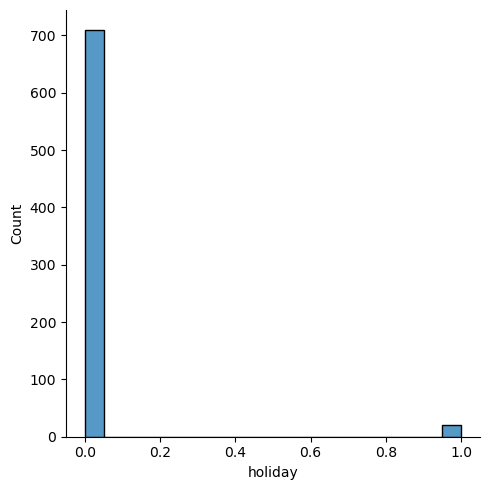

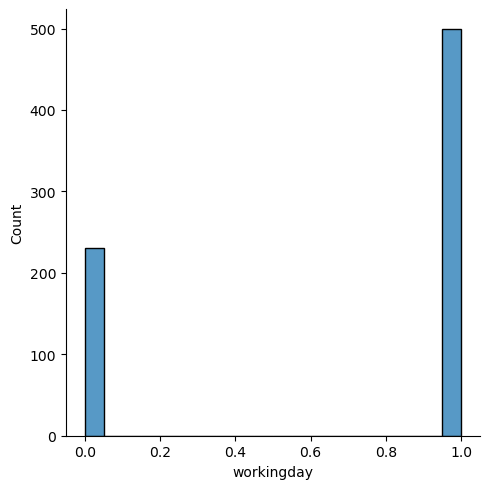

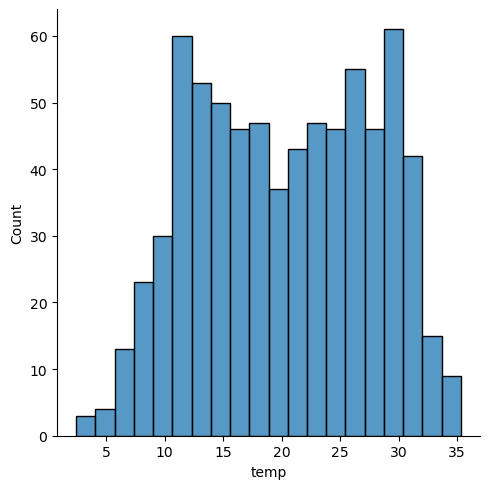

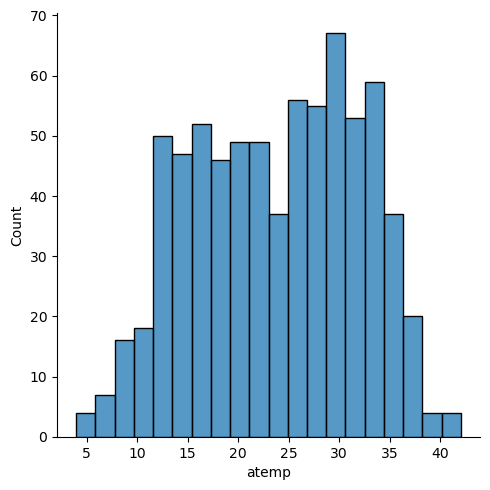

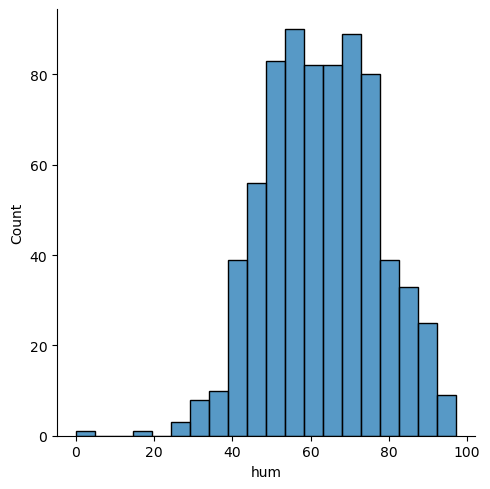

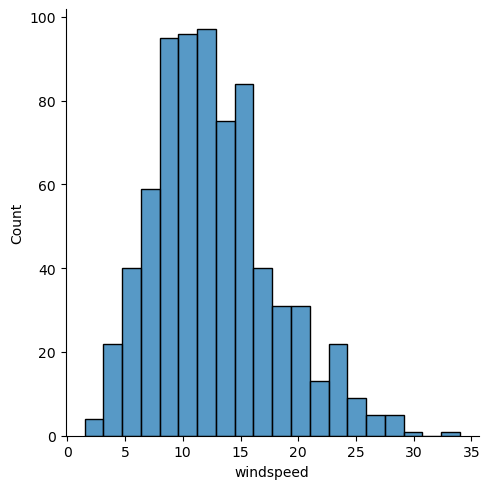

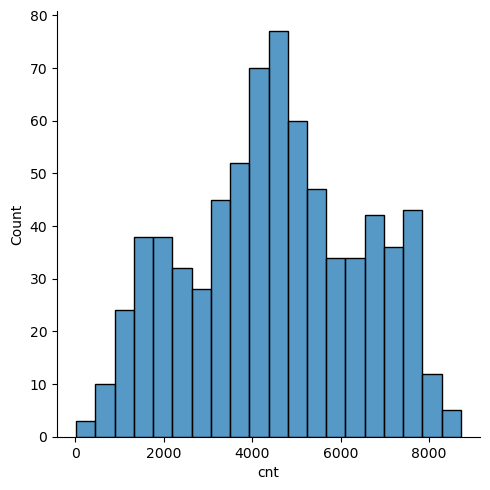

In [14]:
#Plotting numerical columns
for i in num_cols:
    sns.displot(x=data1[i], bins = 20)
    plt.show()

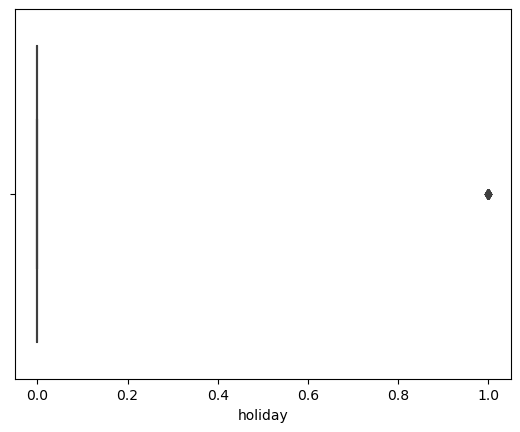

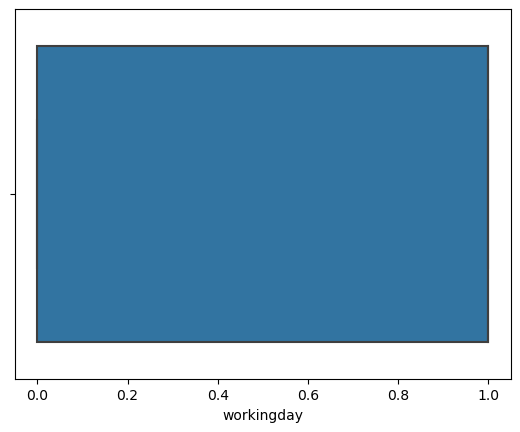

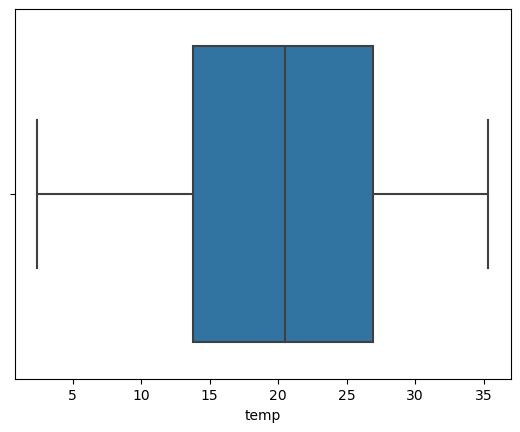

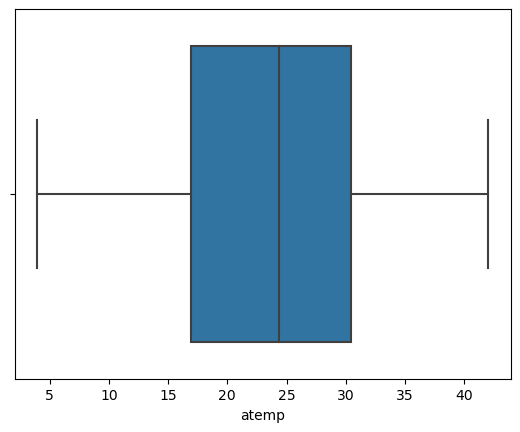

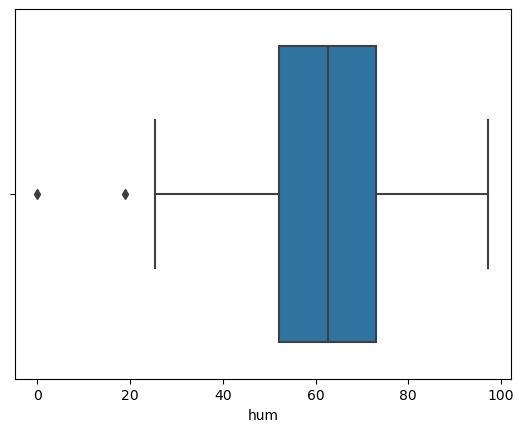

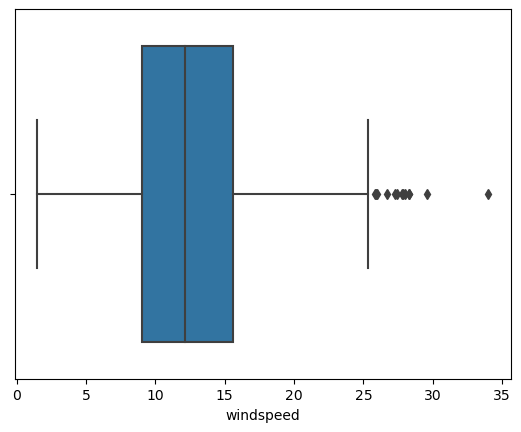

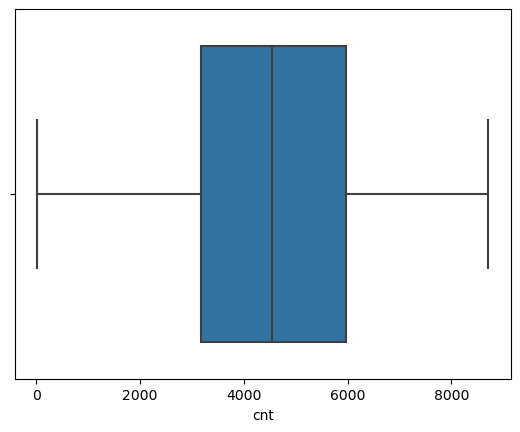

In [15]:
#Box plot to understand the Outliers
for i in num_cols:
    sns.boxplot(x=data1[i])
    plt.show()

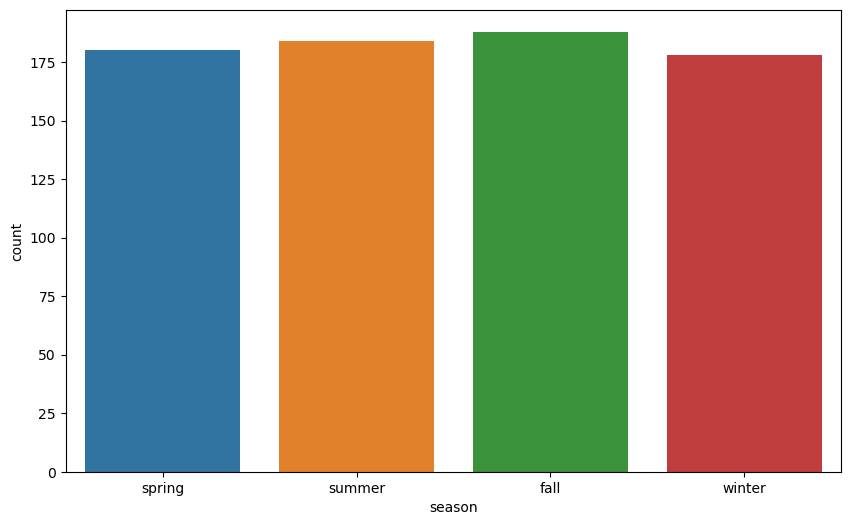

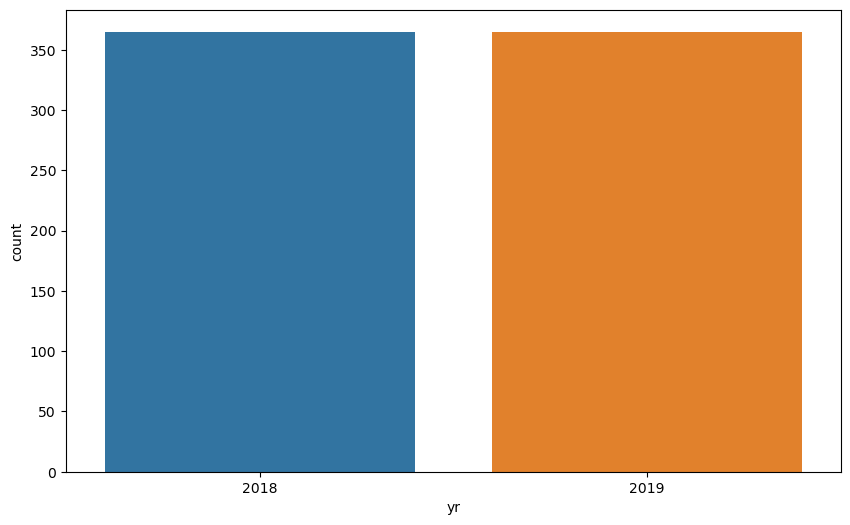

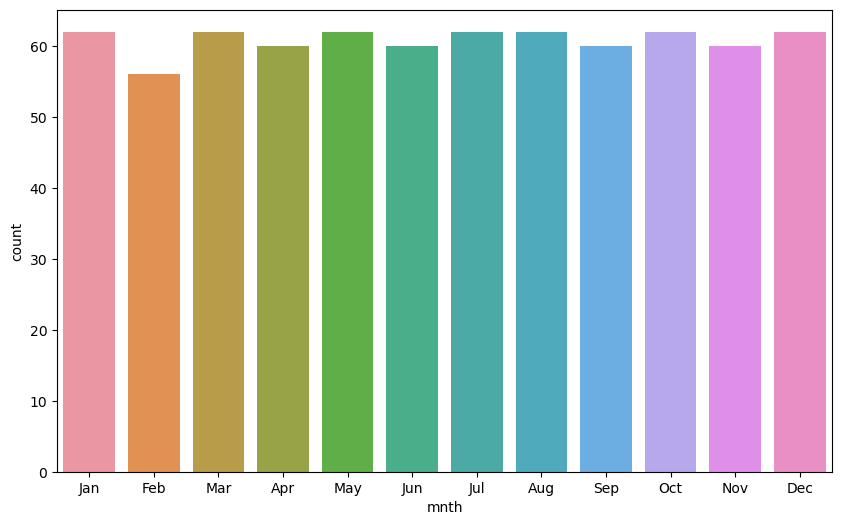

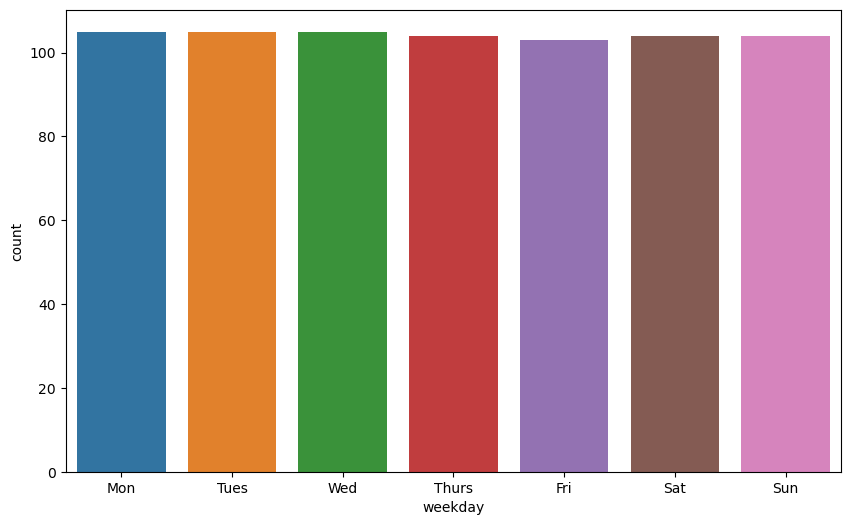

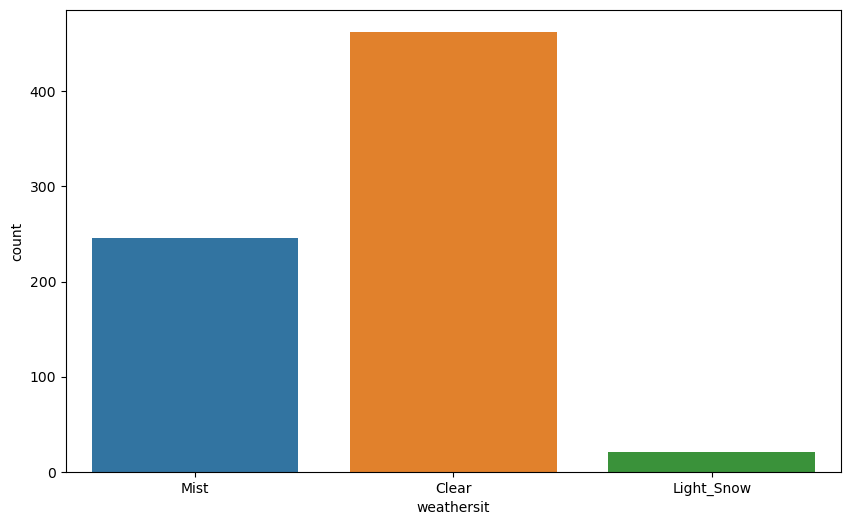

In [16]:
#Plotting categorical columns
for i in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=data1[i])
    plt.show()

#### Observations
- Temperature mainly are on extreme ends peaking at 13degree and 26 degree
- Humidity is more concetrated between 50 to 75 range
- Windspeed is more skewed to the left side of the histogram
- Weather situation is mostly clear

### ii) Bivariate Analysis

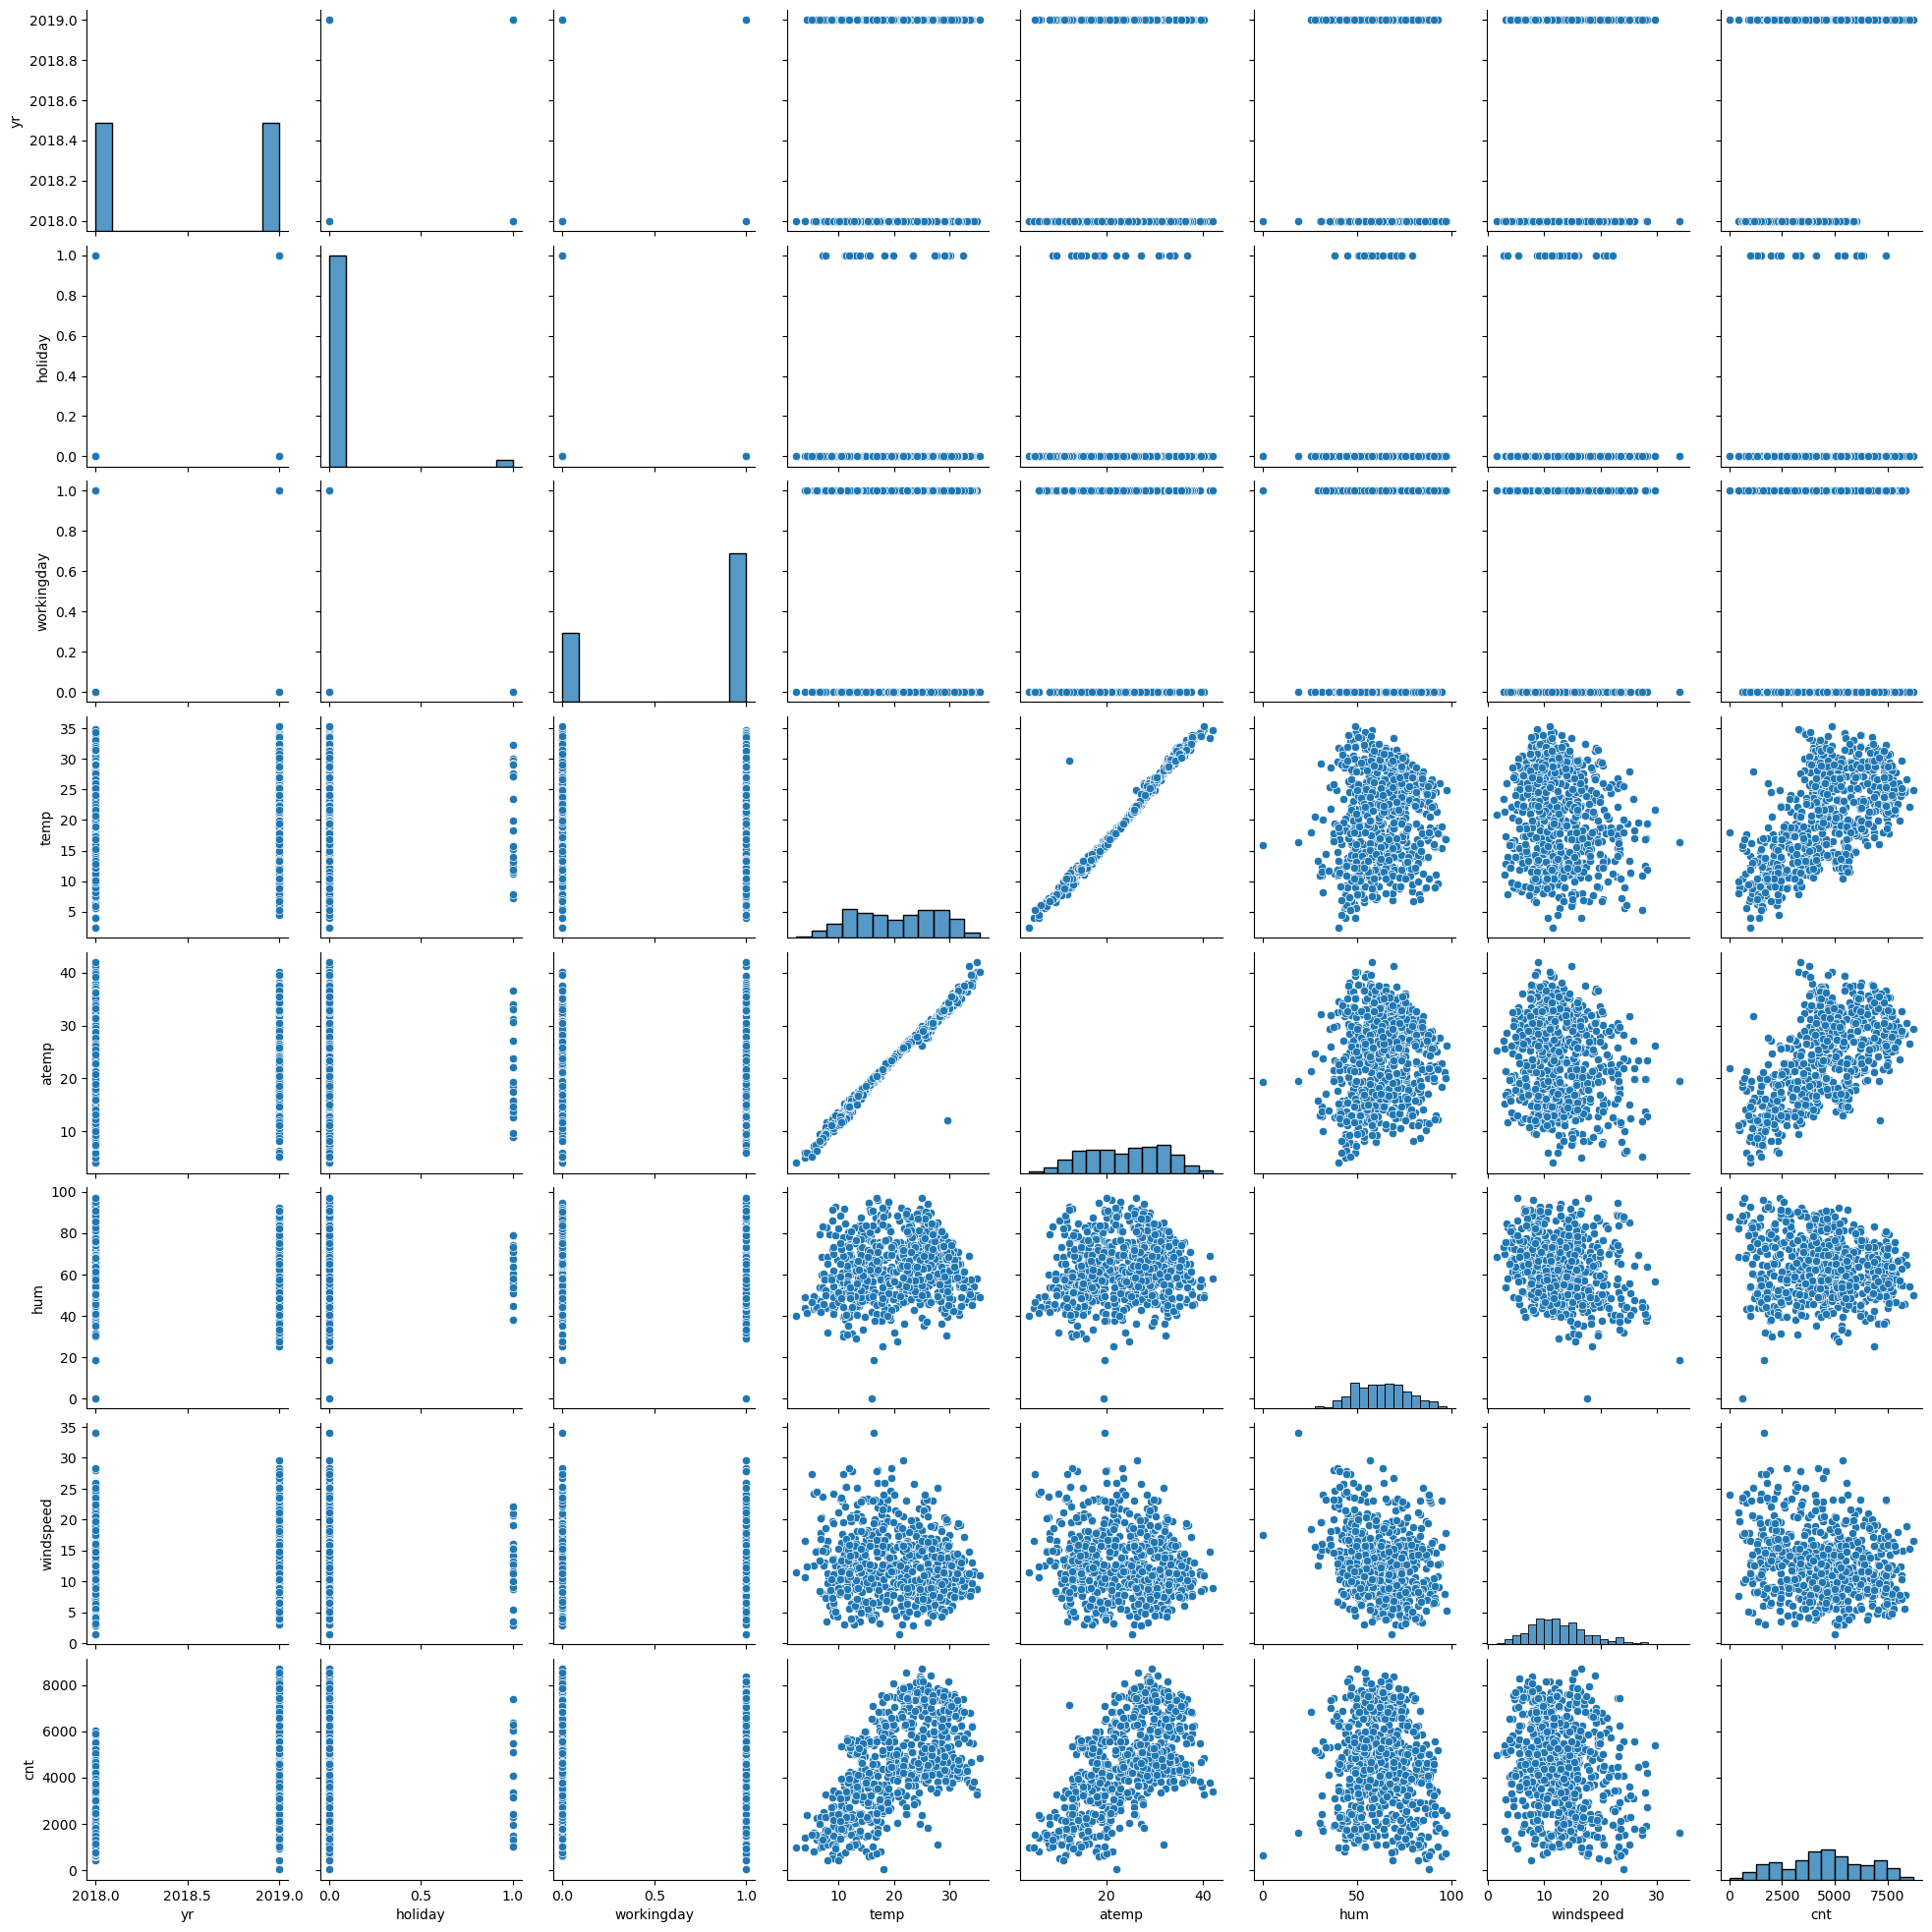

In [17]:
# Visualizing numeric variable
sns.pairplot(data1)
plt.show()

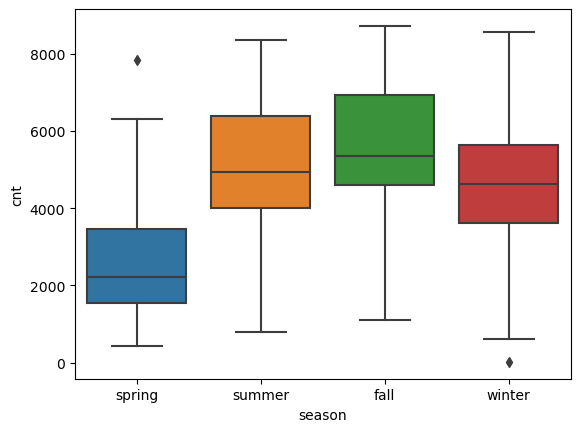

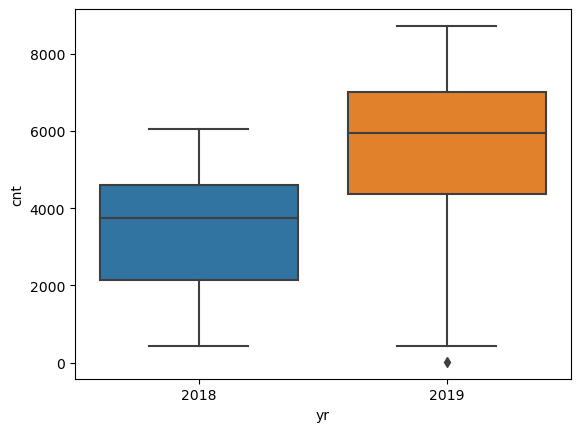

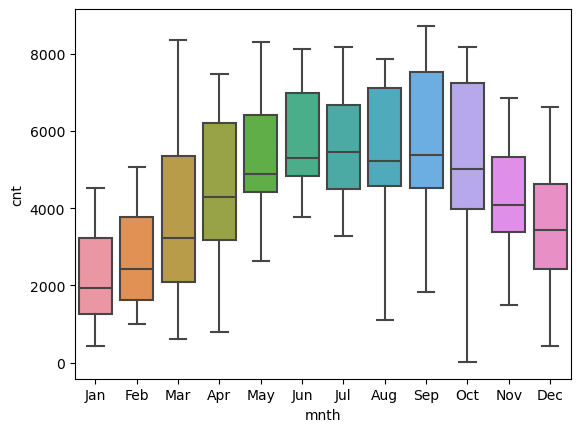

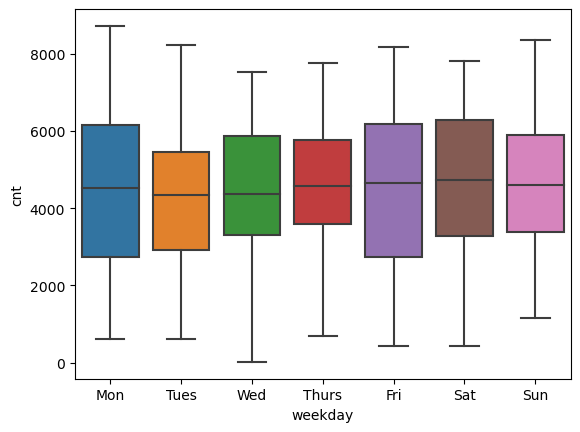

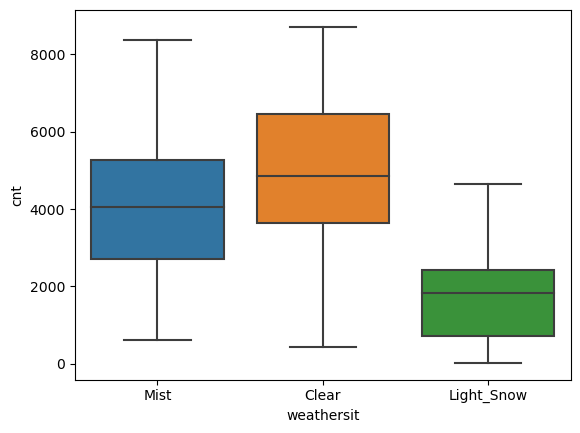

In [18]:
#Plotting bivariate on categorical columns
for i in cat_cols:
    sns.boxplot(x=i, y='cnt', data = data1)
    plt.show()

#### Observations
- Sales have increased in the year 2019 compared to previous year showing a gaining popularity in the bike sharing systems
- Demand seems to be consistent in both the working days and weekends
- temp and atemp have a linear relationship with sales
- sales are considerably higher in summer and fall with sales peaking in June - October. Jan & Feb has the lowest sales.
- Clear weather brings more sales.


### iii) Multivariate Analysis

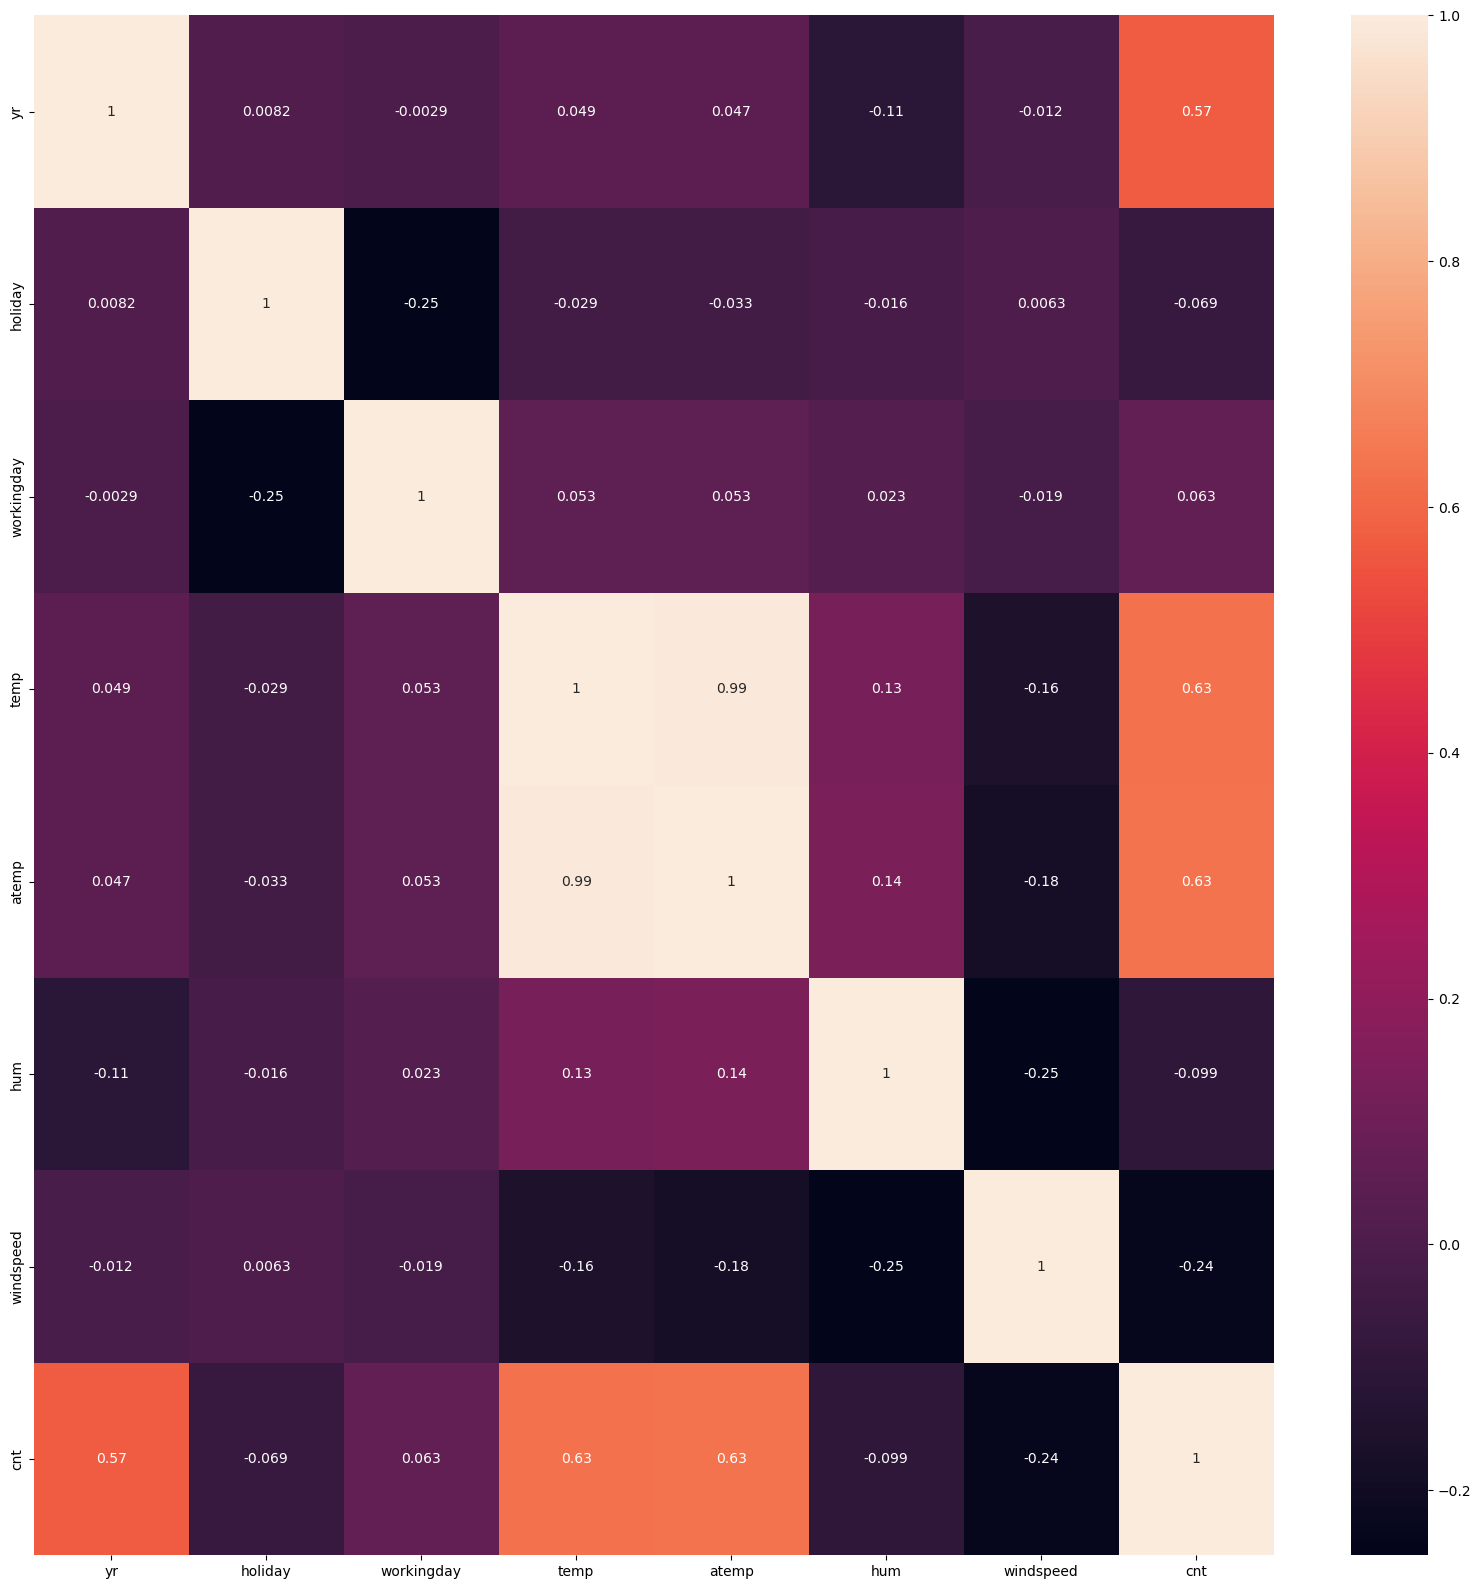

In [19]:
#To find linear correlation between numeric variables
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

#### Observations
- Sales variable 'cnt' is more linearly correlated with temperature variables 'temp' and 'atemp'
- 'cnt' has a negative effect on the windspeed

# 2. Preparing the Data for Modelling
- Encoding:
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables


In [20]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
#Creating dummy vars for categorical variables

season_stats = pd.get_dummies(data1['season'], drop_first=True)
yr_stats = pd.get_dummies(data1['yr'], drop_first=True)
mnth_stats = pd.get_dummies(data1['mnth'], drop_first=True)
wk_stats = pd.get_dummies(data1['weekday'], drop_first=True)
wthr_stats = pd.get_dummies(data1['weathersit'], drop_first=True)

In [22]:
#concatenate the dummy with original one
data2 = pd.concat([data1,season_stats,yr_stats,mnth_stats,wk_stats,wthr_stats], axis = 1)

In [23]:
data2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Mist
0,spring,2018,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data2.shape

(730, 35)

In [25]:
#Dropping the original categorical columns
data3 = data2.drop(['season','yr','mnth','weekday','weathersit'], axis = 1)

In [26]:
data3.shape

(730, 30)

In [27]:
data3.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2a) Splitting into Training & Test set

In [28]:
#Splitting data into train & test with a 70:30 ratio
df_train, df_test = train_test_split(data3, train_size=0.7, random_state=100)

In [29]:
print(df_train.shape, df_test.shape)

(510, 30) (220, 30)


## 2b) Rescaling the features

In [30]:
#Instantiate an object
scaler = MinMaxScaler()

#create the variable list to scale
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Mist
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# 3. Training the Model

In [32]:
#Extracting X_train, y_train from the train set

y_train = df_train.pop('cnt')
X_train = df_train

## 3a) RFE (Recursive Feature Elimination)

In [33]:
# Importing RFE & Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
X_train.columns = X_train.columns.astype(str)

In [35]:
# Create the LinearRegression object
lm = LinearRegression()

# Create the RFE object with the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=22)

# Fit the RFE object
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_col = X_train.columns[rfe.support_]

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 7),
 ('Sun', False, 4),
 ('Thurs', False, 3),
 ('Tues', True, 1),
 ('Wed', False, 2),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [37]:
X_train.columns[~rfe.support_]

Index(['Jun', 'Mar', 'Oct', 'Sat', 'Sun', 'Thurs', 'Wed'], dtype='object')

## 3b) Building model using statsmodel

In [38]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [39]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe) # adding const variable

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          6.09e-187
Time:                        18:15:40   Log-Likelihood:                 525.64
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -914.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2409      0.032      7.522      0.0

In [41]:
#Computing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
2,workingday,inf
1,holiday,inf
20,Tues,inf
19,Mon,inf
3,temp,60.15
4,atemp,54.28
7,spring,8.58
8,summer,6.65
9,winter,6.32
11,Aug,3.19


In [42]:
#dropping High p-value & high VIF
X_train_new = X_train_rfe.drop(['holiday','atemp','spring','summer'], axis = 1)

In [43]:
#Rebuilding the model

X_train_lm = sm.add_constant(X_train_new)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.50e-185
Time:                        18:15:40   Log-Likelihood:                 513.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     491   BIC:                            -908.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2340      0.041      5.775      0.0

In [45]:
#Computing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,103.04
1,workingday,9.24
15,Mon,6.19
16,Tues,5.84
2,temp,3.97
5,winter,2.12
3,hum,1.96
10,Jan,1.92
13,Nov,1.76
11,Jul,1.71


In [46]:
#dropping High p-value & high VIF
X_train_new = X_train_new.drop(['Tues'], axis = 1)

In [47]:
#Rebuilding the model

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.89e-185
Time:                        18:15:40   Log-Likelihood:                 511.52
No. Observations:                 510   AIC:                            -987.0
Df Residuals:                     492   BIC:                            -910.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2783      0.033      8.524      0.0

In [48]:
#Computing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,66.57
2,temp,3.96
5,winter,2.12
3,hum,1.96
10,Jan,1.92
13,Nov,1.73
11,Jul,1.70
15,Mon,1.66
7,Aug,1.66
1,workingday,1.66


In [49]:
#dropping High p-value
X_train_new = X_train_new.drop(['Aug'], axis = 1)

In [50]:
X_train_new.columns

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'winter', '2019',
       'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Mon', 'Light_Snow',
       'Mist'],
      dtype='object')

In [51]:
#Rebuilding the model

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.48e-186
Time:                        18:15:40   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     493   BIC:                            -917.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2794      0.032      8.675      0.0

In [52]:
#Computing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,64.90
2,temp,3.07
5,winter,2.05
3,hum,1.96
9,Jan,1.89
12,Nov,1.72
1,workingday,1.66
14,Mon,1.65
16,Mist,1.57
7,Dec,1.56


#### Observations
- Rsquare is 0.843 which means 84.3% of the variance in Sales is explained by the model which is a good number
- Adjusted Rsquare (0.838) is also a good number
- Prob F-statistic is close to zero
- All the p-values of the model is less than 0.05 which means all of them are statistically significant


# 4. Residual Analysis of the train data

In [53]:
y_train_pred = lm.predict(X_train_lm)

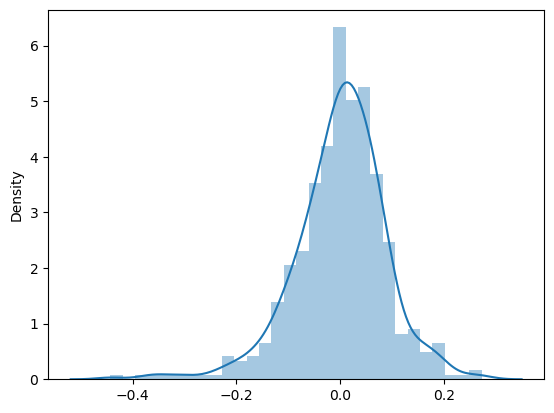

In [54]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# 5. Predictions and Evaluation on the test set

In [55]:
#the variable list that were scaled
num_vars = ['temp','atemp','hum','windspeed','cnt']

#transforming the test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [56]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5a) Dividing into X_test & y_test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test.columns = X_test.columns.astype(str)

In [59]:
X_train_new_no_const = X_train_new.drop(['const'], axis = 1)

In [60]:
#Creating new dataframe by dropping previously removed variables from X_test
X_test_new = X_test[X_train_new_no_const.columns]
#Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [61]:
y_test_pred = lm.predict(X_test_new)

## 5b) Model Evaluation

Text(0, 0.5, 'y_test_pred')

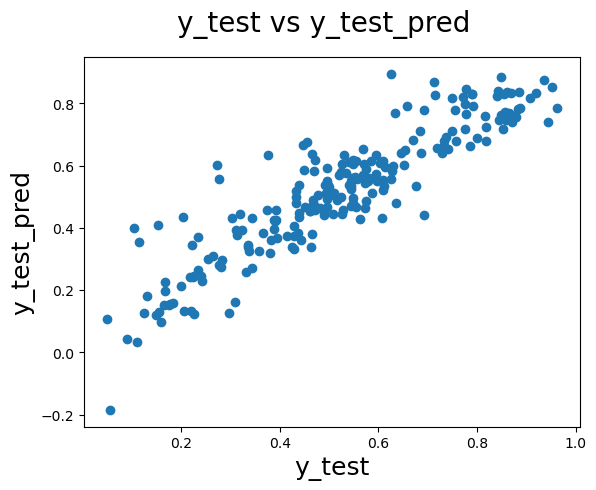

In [62]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize =20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 18)

In [63]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8181281159801911

# Summary

## Model

- Rsquare on train set for final model - 0.843 (84.3% variance explained)
- Adjusted Rsquare - 0.838

### Factors forming the model : 
   - Positive coefficients: 'const', 'workingday', 'temp', 'winter', '2019', 'May',  'Sep', 'Mon',
   - Negative coefficients: 'hum', 'windspeed', 'Dec', 'Feb', 'Jan', 'Jul','Nov', 'Light_Snow', 'Mist'
 

## Model Evaluation
  
- R2 square on test set - 0.818(81.8% variance explained)

- Residual Analysis:
    - Residuals appear normally distributed with a peak at zero, indicating accurate predictions for many observations.


### Factors Intepretation:

- Positive Correlation:

    - Temperature: Major factor with a 0.48 coefficient, indicating higher bike usage in warmer weather.
- Negative Correlation:

    - Humidity, Windspeed, Light Snow: These factors deter bike usage, reflecting lower sales in adverse weather conditions.
- Seasonal and Monthly Effects: The model effectively captures variations in demand across different times of the year.
